## 需要数据降维的情况

数据降维可以降低模型的计算量并减少模型运行时间、降低噪音变量信息对于模型结果的影响、便于通过可视化方式展示归约后的维度信息并减少数据存储空间。因此，大多数情况下，当我们面临高维数据时，都需要对数据做降维处理。是否进行降维主要考虑以下方面：
1. 维度数量。降维的基本前提是高维，假如模型只有几个维度，那就不一定需要降维，具体取决于维度本身的重要性、共线性以及其他排除关系，而不是出于高维的考虑。
2. 建模输出是否必须保留原始维度。某些场景下，我们需要完整保留参与建模的原始维度并在最终建模输出时能够得以分析、解释和应用，这种情况下不能进行转换方式降维，只能选择特征筛选的方式降维。
3. 对模型的计算效率与建模时效性有要求。当面临高维数据建模时，数据模型的消耗将呈几何倍数增长，这种增长带来的结果便是运算效率慢、耗时长。如果对建模时间和时效性有要求，那么降维几乎是必要步骤。
4. 是否要保留完整数据特征。数据降维的基本出发点是在尽量（或最大化）保留原始数据特征的前提下，降低参与建模的维度数。在降维过程中，无论未被表示出来的特征是噪音还是正常分布，这部分信息都无法参与建模。如果某些场景下需要所有数据集的完整特征，那么通常不选择降维。

## 基于特征选择的降维

特征选择指根据一定的规则和经验，直接在原有的维度中挑选一部分参与到计算和建模过程，用选择的特征代替所有特征，不改变原有特征，也不产生新的特征值。
特征选择4种思路:
+ 经验：根据业务专家或是数据专家根据以往的经验、业务理解程度进行综合考虑
+ 测算法： 通过不断测试多种维度选择参与计算，通过结果来反复验证和调整并最终找到最佳特征方案
+ 基于统计方法：通过相关性分析不同维度间的线性相关性，在相关性高的维度中进行人工去除或筛选；或者通过计算不同维度间的互信息量，找到具有较高互信息量的特征集，然后把其中的一个特征去除或留下。
+ 机器学习算法： 通过机器学习算法得到不同特征的权重值，然后再根据权重来选择较大的特征。

特征选择的降维方式好处是可以保留原有维度特征的基础上进行降维，既能满足后续数据处理和建模需求，又能保留维度原本的业务含义，以便于业务理解和应用。对于业务分析性的应用而言，模型的可理解性和可用性很多时候要有限于模型本身的准确率、效率等技术指标。例如，决策树得到的特征规则，可以作为选择用户样本的基础条件，而这些特征规则便是基于输入的维度产生。

## 基于维度转换的降维

这个是按照一定数学变换方法，把给定的一组相关变量（维度）通过数学模型将高纬度空间的数据点映射到低纬度空间中，然后利用映射后变量的特征来表示原有变量的总体特征。这种方式是一种产生新维度的过程，转换后的维度并非原来特征，而是之前特征的转化后的表达式，新的特征丢失了原有数据的业务含义。
通过数据维度变换的降维方法是非常重要的降维方法，这种降维方法分为线性降维和非线性降维两种，其中常用的代表算法包括独立成分分析（ICA），主成分分析（PCA），因子分析（Factor Analysis，FA），线性判别分析（LDA），局部线性嵌入（LLE），核主成分分析（Kernel PCA）等。
PCA适用的场景：
+ 非监督式数据集：它是一种非监督式的降维方法，因此适用于不带有标签的数据集；而对于带有标签的数据集这可以采用LDA。
+ 根据方差自主控制特征数量。最大的主成分的数量会小于或等于特征的数量，这意味着，PCA也可以输出完全相同数量的特征，具体取决于选择特征中结识的方差比例
+ 更少的正则化处理 选择较少的主成分导致较少的平滑，因为我们能够保留更多的数据特征，从而减少正则化
+ 数据量加大的数据集。数据量大包括数据记录多和数据维度多两种情况，PCA对大型数据集的处理效率提高
+ 数据分布是位于相同平面上，数据中存在线性结构

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [4]:
# 数据导入
df = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/master/glass.csv')

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
# 有无缺失值
df.isna().values.any()

False

In [13]:
# 数据概况
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
# 获取特征值
X = df.iloc[:, :-1].values

In [16]:
# 获取标签值
Y = df.iloc[:,[-1]].values

In [64]:
# 使用sklearn 的DecisionTreeClassifier判断变量重要性
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X, Y)

feature_importance = dt_model.feature_importances_

feature_importance

array([0.20462132, 0.06426227, 0.16799114, 0.15372793, 0.07410088,
       0.02786222, 0.09301948, 0.16519298, 0.04922178])

D:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


([<matplotlib.axis.XTick at 0x25004be4630>,
 <a list of 9 Text xticklabel objects>)

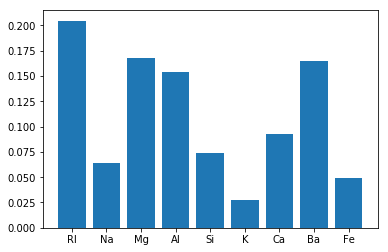

In [29]:
import matplotlib.pyplot as plt

x = range(len(df.columns[:-1])) 
plt.bar(left= x, height=feature_importance)
plt.xticks(x, df.columns[:-1])

In [60]:
# 使用sklearn的PCA进行维度转换
# 建立PCA模型对象
pca_model = PCA(n_components=3)
# 将数据集输入模型
pca_model.fit(X)
# 对数据集进行转换映射
pca_model.transform(X)
# 获得转换后的所有主成分
components = pca_model.components_
# 获得各主成分的方差
components_var = pca_model.explained_variance_
# 获取主成分的方差占比
components_var_ratio = pca_model.explained_variance_ratio_

In [63]:
print(np.round(components_var,3))

[3.002 1.659 0.68 ]


In [62]:
print(np.round(components_var_ratio,3))

[0.476 0.263 0.108]
